In [1]:
# importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
# reading the datasets

game=pd.read_csv(r'C:\programming languages\Data science\Assignment-3\games.csv')
turns=pd.read_csv(r'C:\programming languages\Data science\Assignment-3\turns.csv')
train = pd.read_csv(r'C:\programming languages\Data science\Assignment-3\train.csv')
print(game.shape,turns.shape, train.shape)

(72773, 12) (2005498, 9) (100820, 4)


# EXPLORATORY DATA ANALYSIS & DATA PREPROCESSING

In [4]:
game.head()

,game_id,first,time_control_name,game_end_reason,winner,created_at,lexicon,initial_time_seconds,increment_seconds,rating_mode,max_overtime_minutes,game_duration_seconds
0,1,BetterBot,regular,STANDARD,1,2022-08-26 03:38:49,NWL20,1200,0,CASUAL,1,674.844274
1,2,Super,regular,STANDARD,1,2022-08-10 19:19:59,CSW21,3600,0,RATED,1,364.214418
2,3,BetterBot,regular,STANDARD,1,2022-09-04 08:04:27,CSW21,900,0,RATED,5,492.268262
3,4,BetterBot,regular,RESIGNED,0,2022-09-12 02:36:19,CSW21,3600,0,CASUAL,1,350.861141
4,5,STEEBot,regular,STANDARD,0,2022-09-06 04:31:36,NWL20,1200,0,CASUAL,1,642.688722


In [5]:
turns.head()

,game_id,turn_number,nickname,rack,location,move,points,score,turn_type
0,1,1,BetterBot,DDEGITT,8G,DIG,10,10,Play
1,1,2,stevy,AEHOPUX,7H,HAP,18,18,Play
2,1,3,BetterBot,DEELTTU,6I,LUTE,16,26,Play
3,1,4,stevy,EMORSUX,5K,UM,16,34,Play
4,1,5,BetterBot,ACDEITU,L5,..DICATE,28,54,Play


In [6]:
train.head()

,game_id,nickname,score,rating
0,1,BetterBot,335,1637
1,1,stevy,429,1500
2,3,davidavid,440,1811
3,3,BetterBot,318,2071
4,4,Inandoutworker,119,1473


In [7]:
turns1 = turns.groupby(by='game_id').count()
turns1['game_id'] = turns1.index
turns1= turns1[['game_id','turn_number']]
turns1.index.names = ['index']

In [8]:
turns1.head()

,game_id,turn_number
index,,
1,1,27
2,2,26
3,3,27
4,4,29
5,5,31


In [9]:
train1=pd.merge(train.iloc[::2].reset_index(),train.iloc[1::2].reset_index(),on='game_id',how='inner')
train1= train1.drop(['index_x','index_y'],axis=1)
print(train1.shape)

(50410, 7)


In [2]:
train1

NameError: name 'train1' is not defined

In [10]:
train_merge =pd.merge(train1,game,on='game_id',how='inner')
train_merge =pd.merge(train_merge,turns1,on='game_id',how='inner')
print(train_merge.shape)


(50410, 19)


In [11]:
train_merge.head()

,game_id,nickname_x,score_x,rating_x,nickname_y,score_y,rating_y,first,time_control_name,game_end_reason,winner,created_at,lexicon,initial_time_seconds,increment_seconds,rating_mode,max_overtime_minutes,game_duration_seconds,turn_number
0,1,BetterBot,335,1637,stevy,429,1500,BetterBot,regular,STANDARD,1,2022-08-26 03:38:49,NWL20,1200,0,CASUAL,1,674.844274,27
1,3,davidavid,440,1811,BetterBot,318,2071,BetterBot,regular,STANDARD,1,2022-09-04 08:04:27,CSW21,900,0,RATED,5,492.268262,27
2,4,Inandoutworker,119,1473,BetterBot,478,1936,BetterBot,regular,RESIGNED,0,2022-09-12 02:36:19,CSW21,3600,0,CASUAL,1,350.861141,29
3,5,stevy,325,1500,STEEBot,427,1844,STEEBot,regular,STANDARD,0,2022-09-06 04:31:36,NWL20,1200,0,CASUAL,1,642.688722,31
4,6,HivinD,378,2029,STEEBot,427,2143,HivinD,regular,STANDARD,0,2022-08-21 14:56:35,CSW21,900,0,RATED,1,426.950541,25


In [12]:
train_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50410 entries, 0 to 50409
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   game_id                50410 non-null  int64  
 1   nickname_x             50410 non-null  object 
 2   score_x                50410 non-null  int64  
 3   rating_x               50410 non-null  int64  
 4   nickname_y             50410 non-null  object 
 5   score_y                50410 non-null  int64  
 6   rating_y               50410 non-null  int64  
 7   first                  50410 non-null  object 
 8   time_control_name      50410 non-null  object 
 9   game_end_reason        50410 non-null  object 
 10  winner                 50410 non-null  int64  
 11  created_at             50410 non-null  object 
 12  lexicon                50410 non-null  object 
 13  initial_time_seconds   50410 non-null  int64  
 14  increment_seconds      50410 non-null  int64  
 15  ra

In [13]:
train_merge.nunique()

game_id                  50410
nickname_x                 919
score_x                    653
rating_x                  1161
nickname_y                 895
score_y                    662
rating_y                  1156
first                      915
time_control_name            4
game_end_reason              4
winner                       3
created_at               50125
lexicon                      4
initial_time_seconds        34
increment_seconds           10
rating_mode                  2
max_overtime_minutes         8
game_duration_seconds    50409
turn_number                 42
dtype: int64

In [14]:
train_merge = train_merge.drop(['created_at'],axis=1)

In [15]:
game.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72773 entries, 0 to 72772
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   game_id                72773 non-null  int64  
 1   first                  72773 non-null  object 
 2   time_control_name      72773 non-null  object 
 3   game_end_reason        72773 non-null  object 
 4   winner                 72773 non-null  int64  
 5   created_at             72773 non-null  object 
 6   lexicon                72773 non-null  object 
 7   initial_time_seconds   72773 non-null  int64  
 8   increment_seconds      72773 non-null  int64  
 9   rating_mode            72773 non-null  object 
 10  max_overtime_minutes   72773 non-null  int64  
 11  game_duration_seconds  72773 non-null  float64
dtypes: float64(1), int64(5), object(6)
memory usage: 6.7+ MB


In [16]:
game.time_control_name.unique()

array(['regular', 'rapid', 'blitz', 'ultrablitz'], dtype=object)

In [17]:
game.lexicon.unique()

array(['NWL20', 'CSW21', 'ECWL', 'NSWL20'], dtype=object)

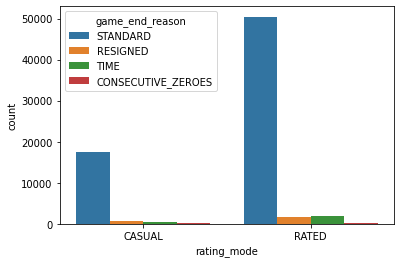

In [18]:
#game end reason vs rating mode

sns.countplot(x='rating_mode',hue='game_end_reason',data=game)
plt.show()

<AxesSubplot:xlabel='time_control_name', ylabel='count'>

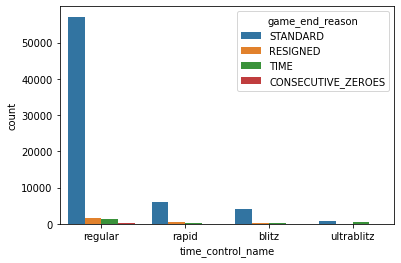

In [19]:
#game end reason vs time control name

sns.countplot(x='time_control_name',hue='game_end_reason',data=game)

SO, game dataset shows some characteristics like:

1. The game end reason was majority of the time because of the standard game play(win/loss)
2. The game end reason was minority of the time because of the consecutive zeros
3. In rated games apart from standard, time played a major role in determining the game end reason

In [20]:
turns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2005498 entries, 0 to 2005497
Data columns (total 9 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   game_id      int64 
 1   turn_number  int64 
 2   nickname     object
 3   rack         object
 4   location     object
 5   move         object
 6   points       int64 
 7   score        int64 
 8   turn_type    object
dtypes: int64(4), object(5)
memory usage: 137.7+ MB


In [21]:
turns.isna().sum()

game_id             0
turn_number         0
nickname            0
rack            69390
location       132239
move              454
points              0
score               0
turn_type         395
dtype: int64

In [22]:
merge1=pd.merge(game,turns,on='game_id',how='inner')
merge1.head(10)

,game_id,first,time_control_name,game_end_reason,winner,created_at,lexicon,initial_time_seconds,increment_seconds,rating_mode,max_overtime_minutes,game_duration_seconds,turn_number,nickname,rack,location,move,points,score,turn_type
0,1,BetterBot,regular,STANDARD,1,2022-08-26 03:38:49,NWL20,1200,0,CASUAL,1,674.844274,1,BetterBot,DDEGITT,8G,DIG,10,10,Play
1,1,BetterBot,regular,STANDARD,1,2022-08-26 03:38:49,NWL20,1200,0,CASUAL,1,674.844274,2,stevy,AEHOPUX,7H,HAP,18,18,Play
2,1,BetterBot,regular,STANDARD,1,2022-08-26 03:38:49,NWL20,1200,0,CASUAL,1,674.844274,3,BetterBot,DEELTTU,6I,LUTE,16,26,Play
3,1,BetterBot,regular,STANDARD,1,2022-08-26 03:38:49,NWL20,1200,0,CASUAL,1,674.844274,4,stevy,EMORSUX,5K,UM,16,34,Play
4,1,BetterBot,regular,STANDARD,1,2022-08-26 03:38:49,NWL20,1200,0,CASUAL,1,674.844274,5,BetterBot,ACDEITU,L5,..DICATE,28,54,Play
5,1,BetterBot,regular,STANDARD,1,2022-08-26 03:38:49,NWL20,1200,0,CASUAL,1,674.844274,6,stevy,EEOORSX,M11,OXO,31,65,Play
6,1,BetterBot,regular,STANDARD,1,2022-08-26 03:38:49,NWL20,1200,0,CASUAL,1,674.844274,7,BetterBot,AAEJRSU,5E,RAJAS,29,83,Play
7,1,BetterBot,regular,STANDARD,1,2022-08-26 03:38:49,NWL20,1200,0,CASUAL,1,674.844274,8,stevy,AEEFIRS,9B,FAERIES,72,137,Play
8,1,BetterBot,regular,STANDARD,1,2022-08-26 03:38:49,NWL20,1200,0,CASUAL,1,674.844274,9,BetterBot,ELNNORU,C3,NEURON.L,68,151,Play
9,1,BetterBot,regular,STANDARD,1,2022-08-26 03:38:49,NWL20,1200,0,CASUAL,1,674.844274,10,stevy,EEEHIKO,6F,HO,35,172,Play


In [23]:
merge1.shape

(2005498, 20)

Lets get our training data incorporated for further analysis

In [26]:
train=pd.read_csv(r"C:\programming languages\Data science\Assignment-3\train.csv")

In [27]:
master=pd.merge(merge1,train,on='game_id',how='inner')

In [28]:
master

,game_id,first,time_control_name,game_end_reason,winner,created_at,lexicon,initial_time_seconds,increment_seconds,rating_mode,...,nickname_x,rack,location,move,points,score_x,turn_type,nickname_y,score_y,rating
0,1,BetterBot,regular,STANDARD,1,2022-08-26 03:38:49,NWL20,1200,0,CASUAL,...,BetterBot,DDEGITT,8G,DIG,10,10,Play,BetterBot,335,1637
1,1,BetterBot,regular,STANDARD,1,2022-08-26 03:38:49,NWL20,1200,0,CASUAL,...,BetterBot,DDEGITT,8G,DIG,10,10,Play,stevy,429,1500
2,1,BetterBot,regular,STANDARD,1,2022-08-26 03:38:49,NWL20,1200,0,CASUAL,...,stevy,AEHOPUX,7H,HAP,18,18,Play,BetterBot,335,1637
3,1,BetterBot,regular,STANDARD,1,2022-08-26 03:38:49,NWL20,1200,0,CASUAL,...,stevy,AEHOPUX,7H,HAP,18,18,Play,stevy,429,1500
4,1,BetterBot,regular,STANDARD,1,2022-08-26 03:38:49,NWL20,1200,0,CASUAL,...,BetterBot,DEELTTU,6I,LUTE,16,26,Play,BetterBot,335,1637
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2782573,72773,HastyBot,regular,STANDARD,1,2022-08-27 09:13:08,CSW21,1200,0,RATED,...,adola,ABRRU,15E,BRA.,7,383,Play,HastyBot,346,2302
2782574,72773,HastyBot,regular,STANDARD,1,2022-08-27 09:13:08,CSW21,1200,0,RATED,...,HastyBot,EIP,7A,PIE,11,342,Play,adola,383,2075
2782575,72773,HastyBot,regular,STANDARD,1,2022-08-27 09:13:08,CSW21,1200,0,RATED,...,HastyBot,EIP,7A,PIE,11,342,Play,HastyBot,346,2302
2782576,72773,HastyBot,regular,STANDARD,1,2022-08-27 09:13:08,CSW21,1200,0,RATED,...,HastyBot,NaN,NaN,(RU),4,346,End,adola,383,2075


Missing values handling

In [29]:
merge1.isna().sum()/merge1.shape[0]*100         #type: ignore

game_id                  0.000000
first                    0.000000
time_control_name        0.000000
game_end_reason          0.000000
winner                   0.000000
created_at               0.000000
lexicon                  0.000000
initial_time_seconds     0.000000
increment_seconds        0.000000
rating_mode              0.000000
max_overtime_minutes     0.000000
game_duration_seconds    0.000000
turn_number              0.000000
nickname                 0.000000
rack                     3.459988
location                 6.593824
move                     0.022638
points                   0.000000
score                    0.000000
turn_type                0.019696
dtype: float64

In [30]:
master.columns

Index(['game_id', 'first', 'time_control_name', 'game_end_reason', 'winner',
       'created_at', 'lexicon', 'initial_time_seconds', 'increment_seconds',
       'rating_mode', 'max_overtime_minutes', 'game_duration_seconds',
       'turn_number', 'nickname_x', 'rack', 'location', 'move', 'points',
       'score_x', 'turn_type', 'nickname_y', 'score_y', 'rating'],
      dtype='object')

TARGET VAR

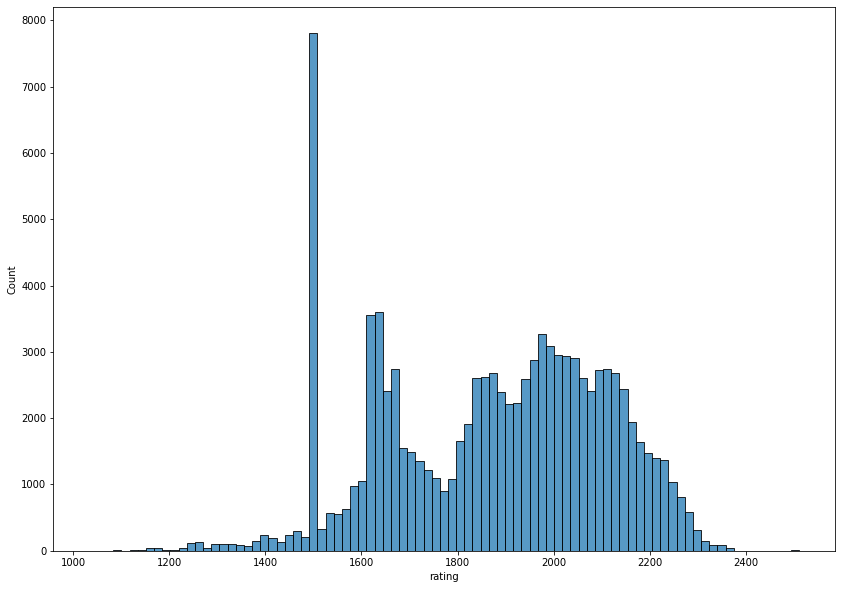

In [31]:
plt.figure(figsize=(14,10))
sns.histplot(train['rating'], ax=plt.gca())
plt.show()

Most players have rating of near to 1500

In [32]:
master.drop(columns=['created_at'],axis=1,inplace=True)

lets see best rated bots

In [33]:
#best rated player vs rating

master.groupby('nickname_y')['rating'].mean().sort_values(ascending=False).head(10)

nickname_y
TKC               2334.644172
JingYaoTheNoob    2254.000000
HBA               2231.076923
AWFUL             2216.601090
Indominus         2202.211679
patricck          2202.177400
zloty             2201.858025
earth             2194.917553
deflate2          2185.320611
forwords          2173.363674
Name: rating, dtype: float64

In [34]:
master['humanbot_x'] = ['Human' if "Bot" not in x else "Bot" for x in master['nickname_x']]
master['humanbot_y'] = ['Human' if "Bot" not in x else "Bot" for x in master['nickname_y']]

In [35]:
master.head(5)

,game_id,first,time_control_name,game_end_reason,winner,lexicon,initial_time_seconds,increment_seconds,rating_mode,max_overtime_minutes,...,location,move,points,score_x,turn_type,nickname_y,score_y,rating,humanbot_x,humanbot_y
0,1,BetterBot,regular,STANDARD,1,NWL20,1200,0,CASUAL,1,...,8G,DIG,10,10,Play,BetterBot,335,1637,Bot,Bot
1,1,BetterBot,regular,STANDARD,1,NWL20,1200,0,CASUAL,1,...,8G,DIG,10,10,Play,stevy,429,1500,Bot,Human
2,1,BetterBot,regular,STANDARD,1,NWL20,1200,0,CASUAL,1,...,7H,HAP,18,18,Play,BetterBot,335,1637,Human,Bot
3,1,BetterBot,regular,STANDARD,1,NWL20,1200,0,CASUAL,1,...,7H,HAP,18,18,Play,stevy,429,1500,Human,Human
4,1,BetterBot,regular,STANDARD,1,NWL20,1200,0,CASUAL,1,...,6I,LUTE,16,26,Play,BetterBot,335,1637,Bot,Bot


In [36]:
master.turn_type.unique()

array(['Play', 'End', 'Exchange', 'Pass', 'Timeout', 'Six-Zero Rule', nan,
       'Challenge'], dtype=object)

In [37]:
master['rating_mode']=master['rating_mode'].map({'CASUAL':0,'RATED':1})

master['game_end_reason']=master['game_end_reason'].map({'STANDARD':0,'TIME':2,'RESIGNATION':1,'CONSECUTIVE_ZEROS':3})

master['lexicon']=master['lexicon'].map({'NWL20':0, 'CSW21':1, 'ECWL':2, 'NSWL20':3})

master['time_control_name']=master['time_control_name'].map({'regular':0, 'rapid':1, 'blitz':2, 'ultrablitz':3})

master['humanbot_x']=master['humanbot_x'].map({'Human':0, 'Bot':1})

master['humanbot_y']=master['humanbot_y'].map({'Human':0, 'Bot':1})

In [38]:
master.shape

(2782578, 24)

In [39]:
#drop null rows

master2=master.dropna()
master2.shape

(2534912, 24)

In [40]:
master2.columns

Index(['game_id', 'first', 'time_control_name', 'game_end_reason', 'winner',
       'lexicon', 'initial_time_seconds', 'increment_seconds', 'rating_mode',
       'max_overtime_minutes', 'game_duration_seconds', 'turn_number',
       'nickname_x', 'rack', 'location', 'move', 'points', 'score_x',
       'turn_type', 'nickname_y', 'score_y', 'rating', 'humanbot_x',
       'humanbot_y'],
      dtype='object')

In [41]:
master2.turn_type.unique()

array(['Play'], dtype=object)

In [42]:
master2.drop(columns=['turn_type'],axis=1,inplace=True)

C:\Users\shivansh uppal\AppData\Local\Temp\ipykernel_23488\2377140813.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  master2.drop(columns=['turn_type'],axis=1,inplace=True)


In [43]:
#getting dummies for turn type,rack,move,location with preserving memory

from sklearn.preprocessing import LabelEncoder

lb=LabelEncoder()

lb.fit(master2['rack'])
master2['rack']=lb.fit_transform(master2['rack'])

lb.fit(master2['move'])
master2['move']=lb.fit_transform(master2['move'])

lb.fit(master2['location'])
master2['location']=lb.fit_transform(master2['location'])

C:\Users\shivansh uppal\AppData\Local\Temp\ipykernel_23488\1205354577.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  master2['rack']=lb.fit_transform(master2['rack'])
C:\Users\shivansh uppal\AppData\Local\Temp\ipykernel_23488\1205354577.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  master2['move']=lb.fit_transform(master2['move'])
C:\Users\shivansh uppal\AppData\Local\Temp\ipykernel_23488\1205354577.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

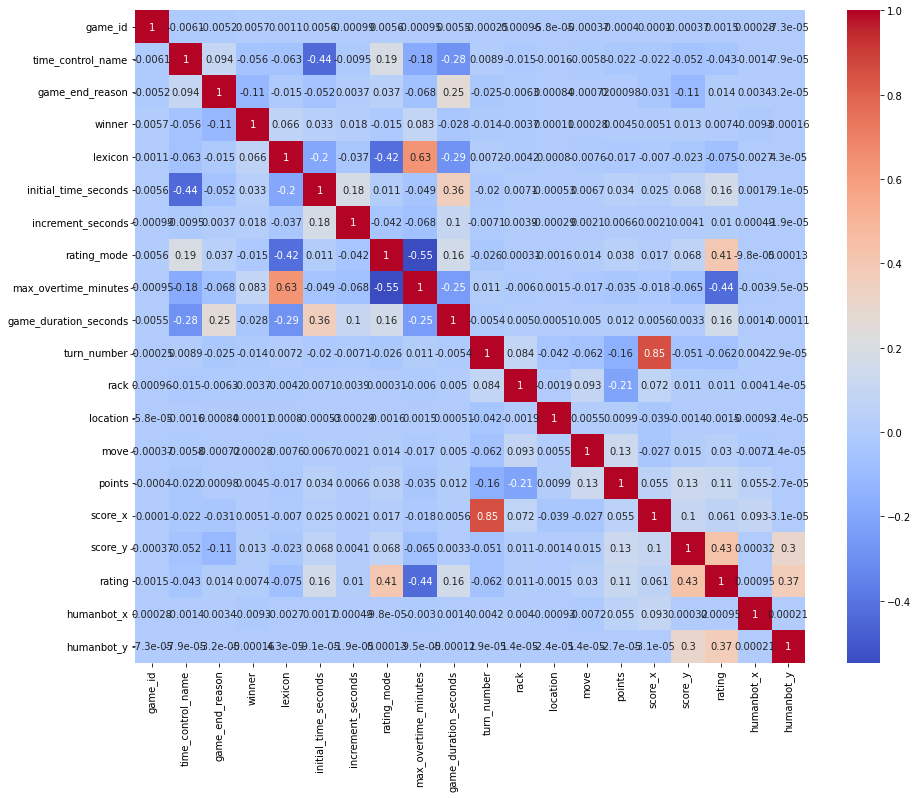

In [44]:
plt.figure(figsize=(15,12))
sns.heatmap(master2.corr(),annot=True,cmap='coolwarm')
plt.show()

In [45]:
master2.drop(columns=['rack','location','move'],axis=1,inplace=True)

C:\Users\shivansh uppal\AppData\Local\Temp\ipykernel_23488\4010661600.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  master2.drop(columns=['rack','location','move'],axis=1,inplace=True)


In [46]:
master2.head()

,game_id,first,time_control_name,game_end_reason,winner,lexicon,initial_time_seconds,increment_seconds,rating_mode,max_overtime_minutes,game_duration_seconds,turn_number,nickname_x,points,score_x,nickname_y,score_y,rating,humanbot_x,humanbot_y
0,1,BetterBot,0,0.0,1,0,1200,0,0,1,674.844274,1,BetterBot,10,10,BetterBot,335,1637,1,1
1,1,BetterBot,0,0.0,1,0,1200,0,0,1,674.844274,1,BetterBot,10,10,stevy,429,1500,1,0
2,1,BetterBot,0,0.0,1,0,1200,0,0,1,674.844274,2,stevy,18,18,BetterBot,335,1637,0,1
3,1,BetterBot,0,0.0,1,0,1200,0,0,1,674.844274,2,stevy,18,18,stevy,429,1500,0,0
4,1,BetterBot,0,0.0,1,0,1200,0,0,1,674.844274,3,BetterBot,16,26,BetterBot,335,1637,1,1


In [47]:
#search for game_id 2

master2.drop(columns=['humanbot_x','nickname_x','score_x'],axis=1,inplace=True)

C:\Users\shivansh uppal\AppData\Local\Temp\ipykernel_23488\2607997231.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  master2.drop(columns=['humanbot_x','nickname_x','score_x'],axis=1,inplace=True)


In [48]:
master2.head()

,game_id,first,time_control_name,game_end_reason,winner,lexicon,initial_time_seconds,increment_seconds,rating_mode,max_overtime_minutes,game_duration_seconds,turn_number,points,nickname_y,score_y,rating,humanbot_y
0,1,BetterBot,0,0.0,1,0,1200,0,0,1,674.844274,1,10,BetterBot,335,1637,1
1,1,BetterBot,0,0.0,1,0,1200,0,0,1,674.844274,1,10,stevy,429,1500,0
2,1,BetterBot,0,0.0,1,0,1200,0,0,1,674.844274,2,18,BetterBot,335,1637,1
3,1,BetterBot,0,0.0,1,0,1200,0,0,1,674.844274,2,18,stevy,429,1500,0
4,1,BetterBot,0,0.0,1,0,1200,0,0,1,674.844274,3,16,BetterBot,335,1637,1


# FEATURE SELECTION

In [49]:
train_merge.head()

,game_id,nickname_x,score_x,rating_x,nickname_y,score_y,rating_y,first,time_control_name,game_end_reason,winner,lexicon,initial_time_seconds,increment_seconds,rating_mode,max_overtime_minutes,game_duration_seconds,turn_number
0,1,BetterBot,335,1637,stevy,429,1500,BetterBot,regular,STANDARD,1,NWL20,1200,0,CASUAL,1,674.844274,27
1,3,davidavid,440,1811,BetterBot,318,2071,BetterBot,regular,STANDARD,1,CSW21,900,0,RATED,5,492.268262,27
2,4,Inandoutworker,119,1473,BetterBot,478,1936,BetterBot,regular,RESIGNED,0,CSW21,3600,0,CASUAL,1,350.861141,29
3,5,stevy,325,1500,STEEBot,427,1844,STEEBot,regular,STANDARD,0,NWL20,1200,0,CASUAL,1,642.688722,31
4,6,HivinD,378,2029,STEEBot,427,2143,HivinD,regular,STANDARD,0,CSW21,900,0,RATED,1,426.950541,25


In [50]:
train_merge.columns

Index(['game_id', 'nickname_x', 'score_x', 'rating_x', 'nickname_y', 'score_y',
       'rating_y', 'first', 'time_control_name', 'game_end_reason', 'winner',
       'lexicon', 'initial_time_seconds', 'increment_seconds', 'rating_mode',
       'max_overtime_minutes', 'game_duration_seconds', 'turn_number'],
      dtype='object')

In [71]:
y = train_merge['rating_y']
X = train_merge.drop(['rating_y','game_id'],axis=1)
print(X.shape, y.shape)

(50410, 16) (50410,)


In [72]:
cat=['nickname_x','nickname_y','first','time_control_name',
     'game_end_reason','lexicon','rating_mode']

num=['score_x', 'rating_x','score_y','winner','initial_time_seconds', 
     'increment_seconds','max_overtime_minutes', 'game_duration_seconds',
     'turn_number']

In [73]:
X_num,X_cat= X[num],X[cat]

Feature 0: 55.160696
Feature 1: 12228.683243
Feature 2: 10911.181302
Feature 3: 0.594035
Feature 4: 1087.177175
Feature 5: 1.187562
Feature 6: 11710.281625
Feature 7: 1173.640489
Feature 8: 3972.980899


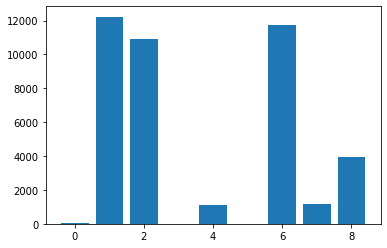

In [74]:
# Applying Pearson's correlation on X_num

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

fs = SelectKBest(score_func=f_regression, k=4)
fs.fit(X_num, y)
X_num_fs = fs.transform(X_num)

for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

Feature 0: 10.302341
Feature 1: 11.943963
Feature 2: 6.982388
Feature 3: 5.808921
Feature 4: 1.852277
Feature 5: 24.301207
Feature 6: 38.995396


c:\Users\shivansh uppal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectKBest was fitted without feature names
  warnings.warn(


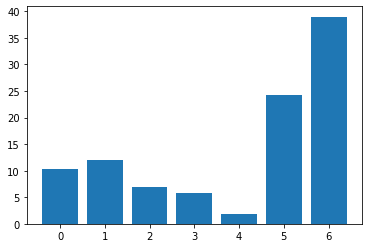

In [75]:
# Applying ANOVA F-Test on X_cat

from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

oe=OrdinalEncoder()
X_cat_oe=oe.fit_transform(X_cat).astype('int')

fs = SelectKBest(score_func=f_classif, k=2)
fs.fit(X_cat_oe, y)
X_cat_fs = fs.transform(X_cat)

for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

### ONE HOT ENCODING

In [76]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False, drop='first')
X_cat_ohe = ohe.fit_transform(X_cat_fs)
print(X_cat_ohe.shape)

(50410, 4)


In [77]:
X_final=np.concatenate([X_num_fs,X_cat_ohe],axis=1)
print(X_final.shape)

(50410, 8)


### TRAIN TEST SPLIT

In [78]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_final,y,test_size=0.2) 
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(40328, 8) (10082, 8) (40328,) (10082,)


### DATA SCALING

In [79]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler(feature_range=(0,1))
mms.fit(X_train)
X_train_scaled = mms.transform(X_train)
X_test_scaled = mms.transform(X_test)
print(X_train_scaled.shape,X_test_scaled.shape)

(40328, 8) (10082, 8)


# ML MODEL

### Linear Regression

In [92]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [93]:
y_pred = np.round(lr.predict(X_test_scaled)).astype('int32')

In [94]:
y_pred

array([1912, 1901, 2182, ..., 1554, 1927, 1571])

In [95]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

y_pred = np.round(lr.predict(X_test_scaled)).astype('int32')

from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2_scor = r2_score(y_test, y_pred)
print('MAE: {0}'.format(mae))
print('MSE:{0}'.format(mse))
print('R2 Score:{0}'.format(r2_scor))

MAE: 108.53650069430668
MSE:20323.10087284269
R2 Score:0.6151789514692063


### Random Forest Regression

In [1]:
#random forest regression

from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=1000, max_features='sqrt')
rfr.fit(X_train_scaled, y_train)

y_pred = np.round(rfr.predict(X_test_scaled)).astype('int32')

y_pred

NameError: name 'X_train_scaled' is not defined

In [103]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2_sc = r2_score(y_test, y_pred)

print('MAE: {0}'.format(mae))
print('MSE:{0}'.format(mse))
print('R2 Score:{0}'.format(r2_sc))

MAE: 91.9361237849633
MSE:16906.788930767703
R2 Score:0.6798673448341347


### XGBoost Regression

In [105]:
from xgboost import XGBRegressor

xgb = XGBRegressor()
xgb.fit(X_train_scaled, y_train)

y_pred = np.round(xgb.predict(X_test_scaled)).astype('int32')

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2_sc = r2_score(y_test, y_pred)  # type: ignore

print('MAE: {0}'.format(mae))
print('MSE:{0}'.format(mse))
print('R2 Score:{0}'.format(r2_sc))

MAE: 90.5135885736957
MSE:16149.191033525094
R2 Score:0.6942125778281412
